In [107]:
import pandas as pd
import numpy as np

In [108]:
df = pd.read_csv("data/telco-customer-churn.csv")
df.shape


(7043, 21)

*Exploratory Data Analysis (EDA) Stage 1.*

In [109]:
df.head() 
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


*EDA Stage 2: Cleaning & Inspection*

In [110]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [111]:
df.duplicated().sum()


np.int64(0)

In [112]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

*Data Cleaning*

In [113]:
# Drop customerID since it's not useful
df = df.drop("customerID", axis=1)

# Fix TotalCharges (convert to numeric, coerce errors)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check how many nulls appeared after conversion
df["TotalCharges"].isnull().sum()


np.int64(11)

In [114]:
# Count nulls after converting TotalCharges
null_count = df["TotalCharges"].isnull().sum()
print("Number of nulls in TotalCharges:", null_count)


Number of nulls in TotalCharges: 11


In [115]:
df = df.dropna(subset=["TotalCharges"])


In [116]:
df["Churn"] = df["Churn"].apply(lambda x: 1 if x=="Yes" else 0)


In [117]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")


EDA (Exploratory Data Analysis)

Target distribution

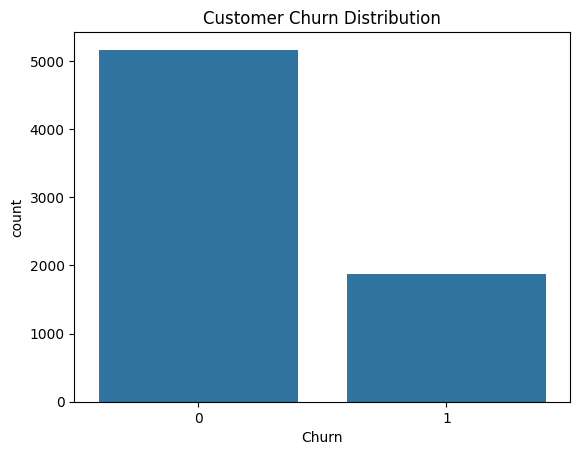

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution
sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.show()

# Quick percentages
churn_pct = df["Churn"].value_counts(normalize=True) * 100
print(churn_pct)


Numeric features distribution

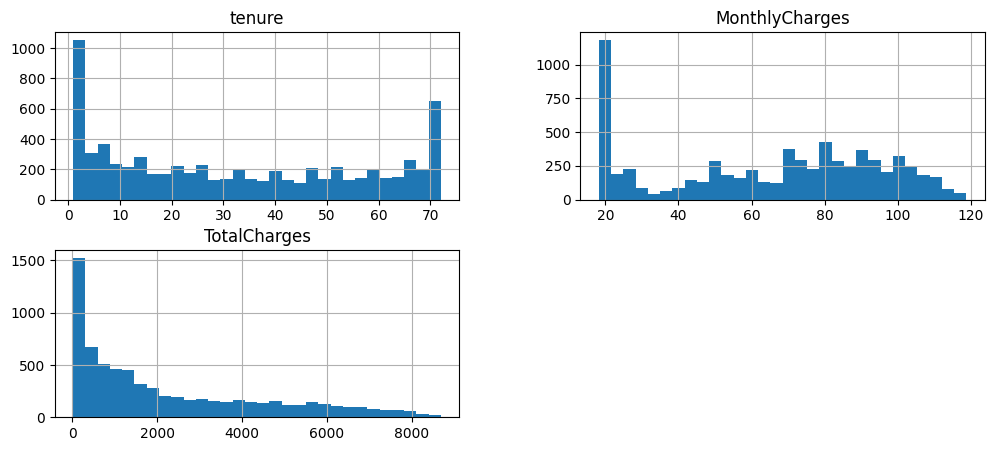

In [119]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[numeric_cols].hist(bins=30, figsize=(12,5))
plt.show()


Churn vs categorical features

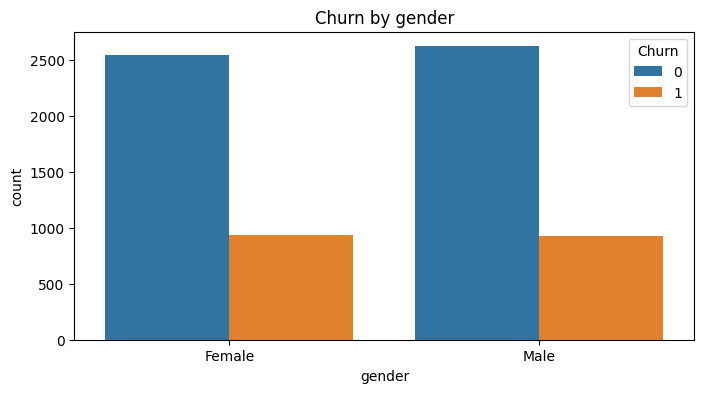

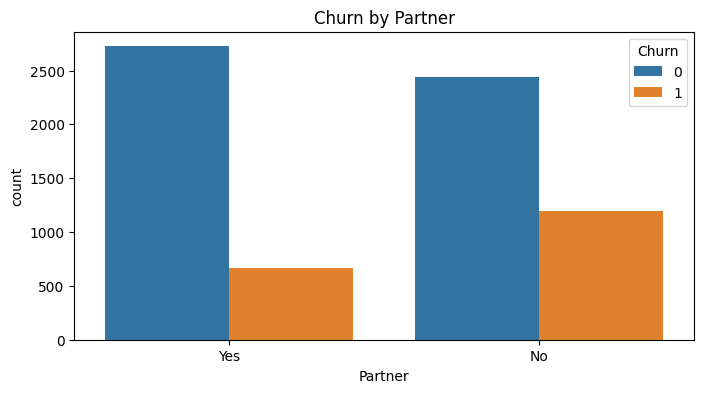

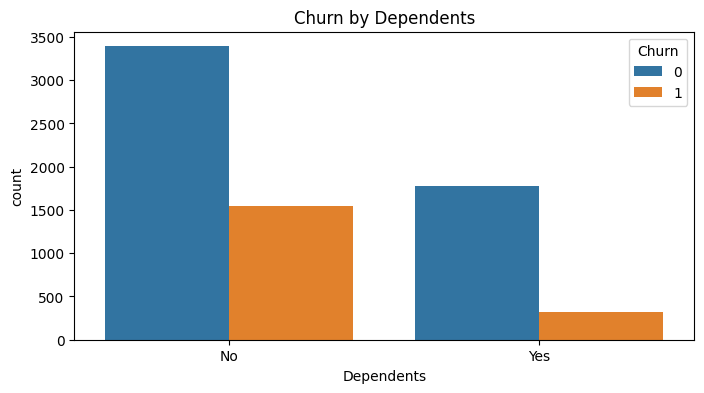

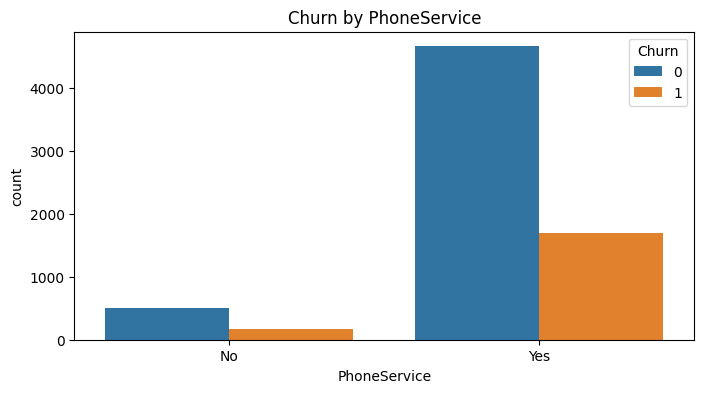

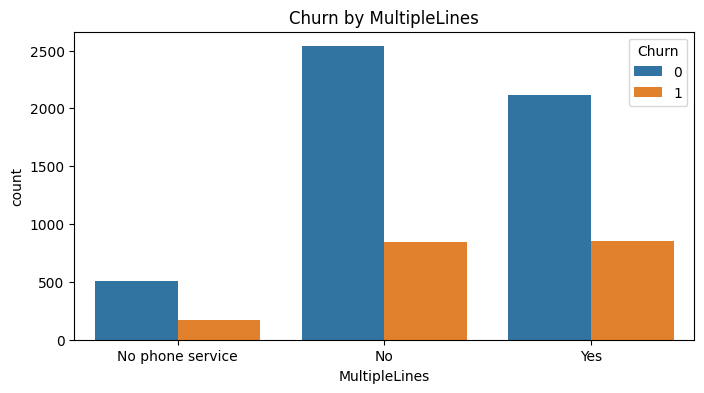

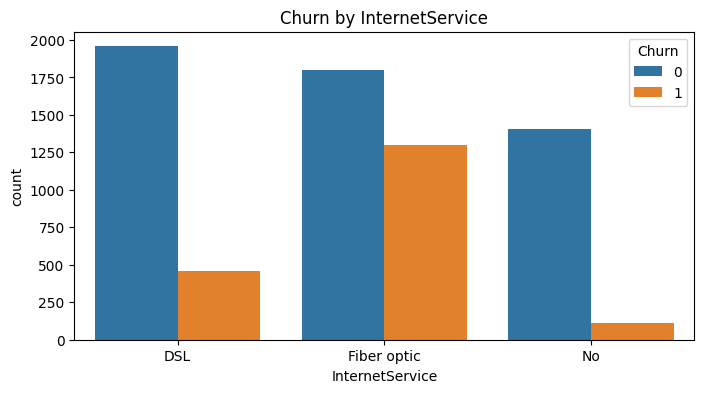

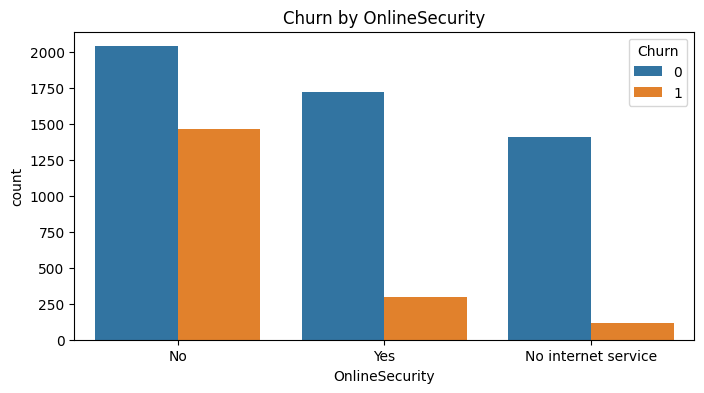

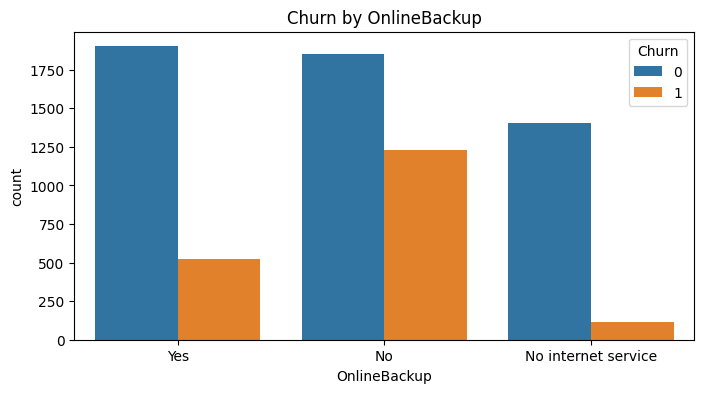

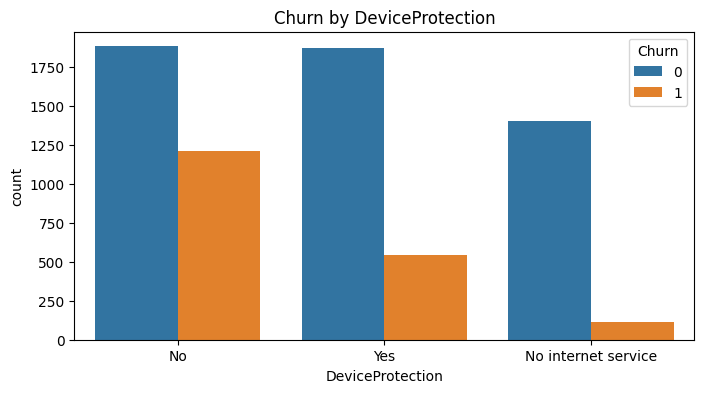

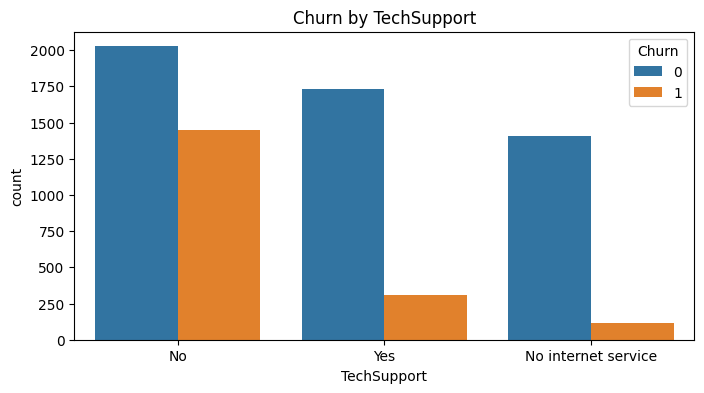

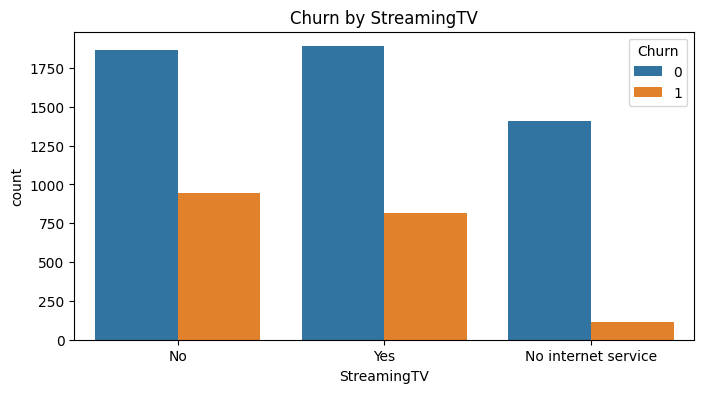

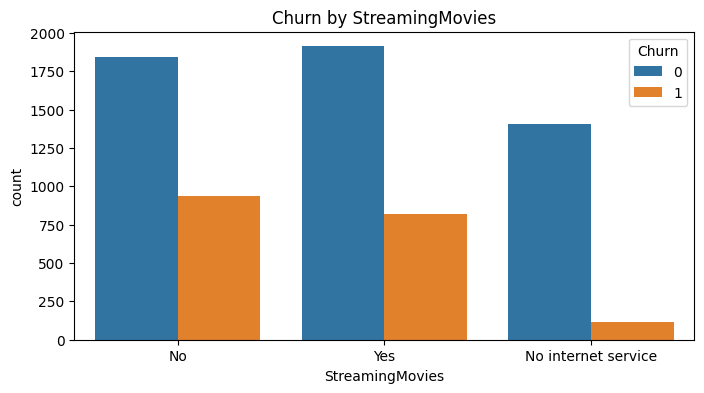

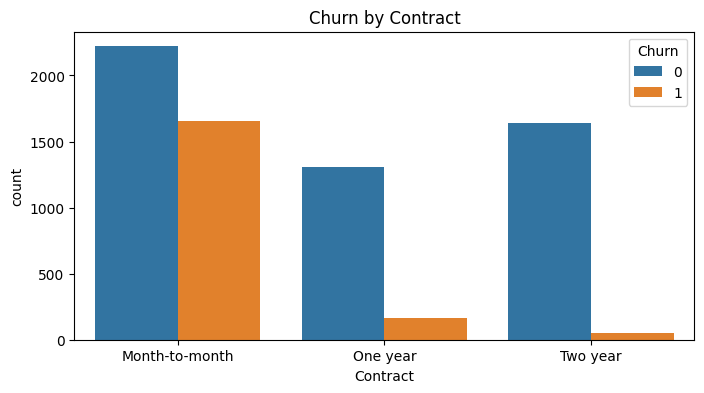

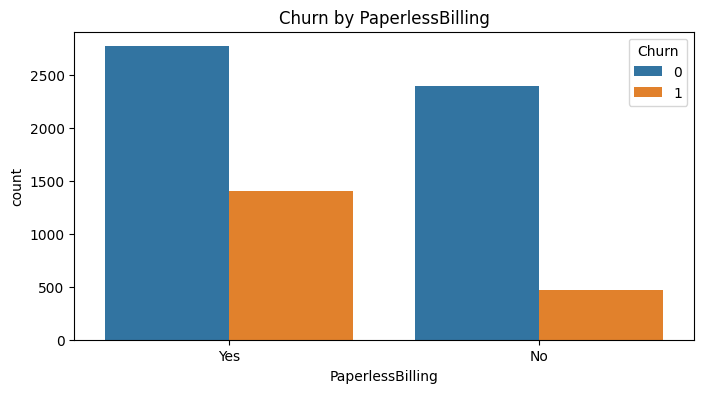

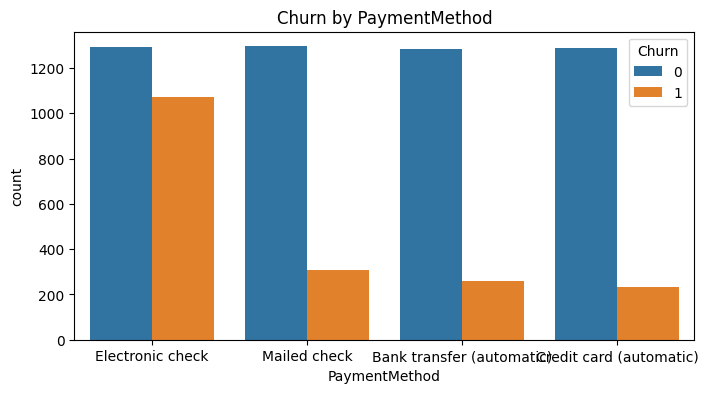

In [120]:
categorical_cols = ["gender", "Partner", "Dependents", "PhoneService", 
                    "MultipleLines", "InternetService", "OnlineSecurity", 
                    "OnlineBackup", "DeviceProtection", "TechSupport", 
                    "StreamingTV", "StreamingMovies", "Contract", 
                    "PaperlessBilling", "PaymentMethod"]

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"Churn by {col}")
    plt.show()


Correlation Heatmap (numerical

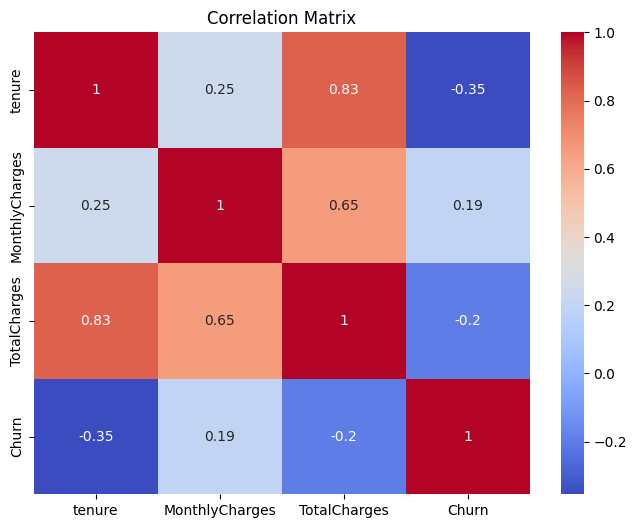

In [121]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols + ["Churn"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Stage 4 - Feature Engineering & Preprocessing

4.1 Encode Categorical Variables

In [122]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x=="Yes" else 0)


In [123]:
multi_cat_cols = ["MultipleLines", "InternetService", "OnlineSecurity",
                  "OnlineBackup", "DeviceProtection", "TechSupport",
                  "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)


In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(df[["tenure", "MonthlyCharges", "TotalCharges"]])


In [125]:
# Confirm all datatypes
df.dtypes

# Quick peek at first rows
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,False,False,False,False,False,False,False,False,True,False
1,Male,0,0,0,0.464789,1,0,0.385075,0.215867,0,...,False,False,False,False,False,True,False,False,False,True
2,Male,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,False,False,False,False,False,False,False,False,False,True
3,Male,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,True,False,False,False,False,True,False,False,False,False
4,Female,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,False,False,False,False,False,False,False,False,True,False


Step 5 – Baseline Modeling: Logistic Regression

5.1 Split Dataset into Features & Target

In [126]:
# Target variable
y = df["Churn"]

# Features (drop target)
X = df.drop("Churn", axis=1)


5.2 Train-Test Split

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [128]:
# See which columns are still object/string
df.select_dtypes(include="object").columns


Index(['gender', 'SeniorCitizen'], dtype='object')

In [129]:
# Encode gender: Male=1, Female=0
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

# Confirm all remaining object columns are gone
print(df.select_dtypes(include="object").columns)


Index(['SeniorCitizen'], dtype='object')


5.3 Train Logistic Regression Model

In [130]:
# Encode gender: Male = 1, Female = 0
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

# Ensure SeniorCitizen is numeric (0/1)
df["SeniorCitizen"] = df["SeniorCitizen"].astype(int)


In [131]:
df.dtypes.value_counts()


bool       21
int64       7
float64     3
Name: count, dtype: int64

In [132]:
# Convert all boolean columns to int
bool_cols = df.select_dtypes(include="bool").columns
df[bool_cols] = df[bool_cols].astype(int)


In [133]:
df.dtypes.value_counts()


int64      28
float64     3
Name: count, dtype: int64

5.3 Train Logistic Regression Model

In [134]:
# Target variable
y = df["Churn"]

# Features (drop target)
X = df.drop("Churn", axis=1)

# Split again (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [135]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# --------------------------------------------
# Step 6 – Refined Logistic Regression Baseline

# 6.1 Train the model with class_weight='balanced'
# ------------------------------------------------

In [136]:
from sklearn.linear_model import LogisticRegression

# Initialize model with class imbalance handling
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train model
lr_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


“We used class_weight='balanced' because the churn class is slightly underrepresented. This ensures the model does not bias toward the majority class.”

In [137]:
lr_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [138]:
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:,1]


# -----------------------------
# Step 7: Logistic Regression Baseline
# -----------------------------


Accuracy: 0.7270788912579957


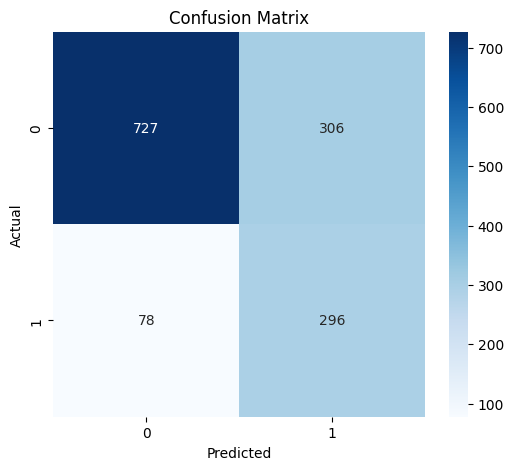

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



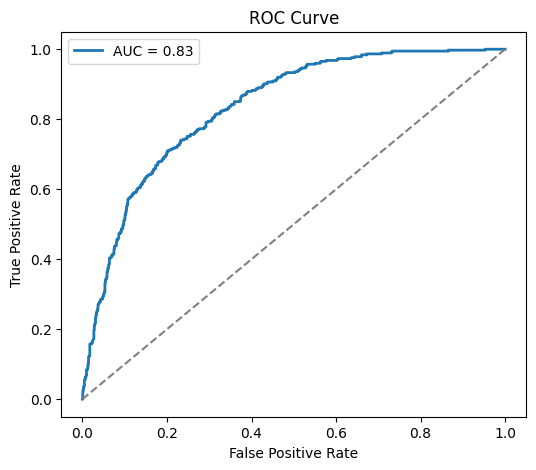

Top 10 Features Increasing Churn:
                           Feature  Coefficient
8                     TotalCharges     1.430738
11     InternetService_Fiber optic     0.779744
9   MultipleLines_No phone service     0.448496
28  PaymentMethod_Electronic check     0.416762
10               MultipleLines_Yes     0.265068
6                 PaperlessBilling     0.253855
22                 StreamingTV_Yes     0.248071
24             StreamingMovies_Yes     0.234183
1                    SeniorCitizen     0.198249
29      PaymentMethod_Mailed check     0.080330

Top 10 Features Decreasing Churn:
                             Feature  Coefficient
19   TechSupport_No internet service    -0.112852
15  OnlineBackup_No internet service    -0.112852
21   StreamingTV_No internet service    -0.112852
16                  OnlineBackup_Yes    -0.179505
3                         Dependents    -0.228838
20                   TechSupport_Yes    -0.368217
14                OnlineSecurity_Yes    -0.415846
25 

In [139]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 5.1 Initialize and train the model
lr_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
lr_model.fit(X_train, y_train)

# 5.2 Make predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:,1]

# 5.3 Evaluate the model

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", linewidth=2)
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 5.4 Interpret feature importance (coefficients)
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

# Top 10 features that increase churn
print("Top 10 Features Increasing Churn:")
print(coefficients.head(10))

# Top 10 features that decrease churn
print("\nTop 10 Features Decreasing Churn:")
print(coefficients.tail(10))


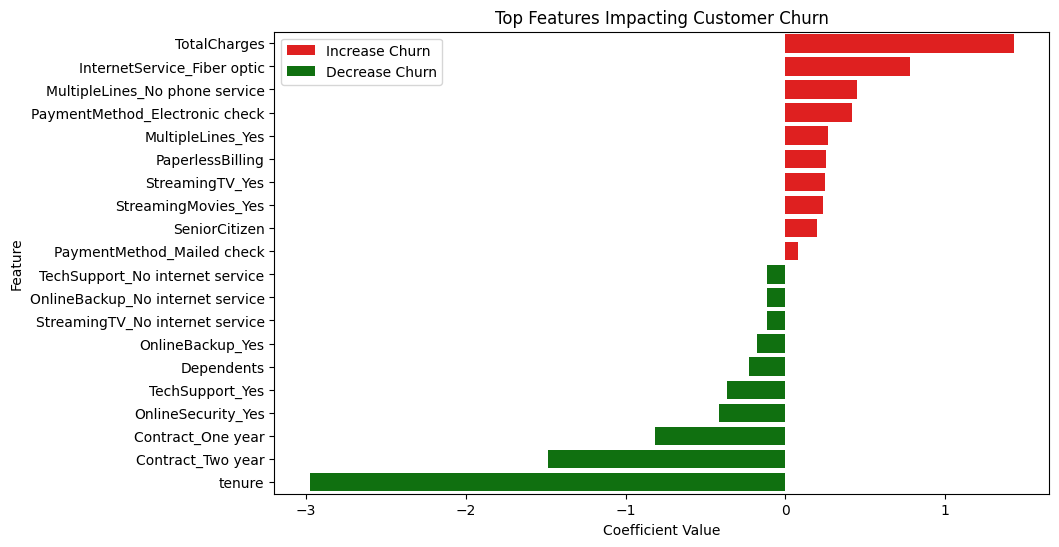

In [140]:
# Top 10 features increasing churn
top_pos = coefficients.head(10)
# Top 10 features decreasing churn
top_neg = coefficients.tail(10)

plt.figure(figsize=(10,6))

# Plot positive coefficients
sns.barplot(x="Coefficient", y="Feature", data=top_pos, color="red", label="Increase Churn")

# Plot negative coefficients
sns.barplot(x="Coefficient", y="Feature", data=top_neg, color="green", label="Decrease Churn")

plt.title("Top Features Impacting Customer Churn")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.legend()
plt.show()


In [141]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Top features
coefficients


,Feature,Coefficient
8,TotalCharges,1.430738
11,InternetService_Fiber optic,0.779744
9,MultipleLines_No phone service,0.448496
28,PaymentMethod_Electronic check,0.416762
10,MultipleLines_Yes,0.265068
6,PaperlessBilling,0.253855
22,StreamingTV_Yes,0.248071
24,StreamingMovies_Yes,0.234183
1,SeniorCitizen,0.198249
29,PaymentMethod_Mailed check,0.080330


Step 7. Feature Engineering & Advanced Modeling


6.1 Check for interactions and create new features

For churn, some commonly useful engineered features are:

Tenure groups — customers with very low or very high tenure often behave differently:

In [142]:
# Create tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=[1,2,3,4,5])


Average charges per month — sometimes monthly behavior is more telling than total charges:

In [143]:
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure', 'avg_charge']


In [151]:
# Create avg_charge again
df['avg_charge'] = df['TotalCharges'] / (df['tenure'].replace(0, 1))

# Define numeric columns
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure', 'avg_charge']

# Replace inf/-inf with NaN
df[num_cols] = df[num_cols].replace([np.inf, -np.inf], np.nan)

# Fill missing values with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [152]:
import numpy as np

# Replace inf/-inf with NaN in the actual DataFrame
df[num_cols] = df[num_cols].replace([np.inf, -np.inf], np.nan)

# Fill missing values with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [145]:
df['avg_charge'] = df['TotalCharges'] / df['tenure']
df['avg_charge'] = df['avg_charge'].replace([np.inf, -np.inf], 0)


In [ ]:
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure', 'avg_charge']

# Check for NaNs or inf
df[num_cols].isnull().sum()
df[num_cols].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_4180\3227906935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols].replace([np.inf, -np.inf], np.nan, inplace=True)


In [150]:
from sklearn.preprocessing import StandardScaler

num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure', 'avg_charge']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


Step 7 – Train Random Forest Classifier
7.1 Import and initialize model

In [148]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=8,           # prevent overfitting
    random_state=42,
    class_weight='balanced' # handle imbalance in Churn
)


In [149]:
rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [153]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.78      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.75      0.76      1407

[[758 275]
 [ 83 291]]


🔹 Interpretation

Accuracy: 75% → not bad, but can improve with tuning.

Class 0 (non-churn):

Precision 0.90 → when the model predicts “non-churn”, it’s right 90% of the time.

Recall 0.73 → it catches 73% of actual non-churns.

Class 1 (churn):

Precision 0.51 → only 51% of predicted churns are correct (can improve).

Recall 0.78 → it catches 78% of actual churners → important for business.

F1-score: balances precision and recall. 0.62 for churn is okay but leaves room to improve.

[[758 275]   -> 758 correctly predicted non-churn, 275 misclassified
 [ 83 291]]  -> 291 correctly predicted churn, 83 misclassified


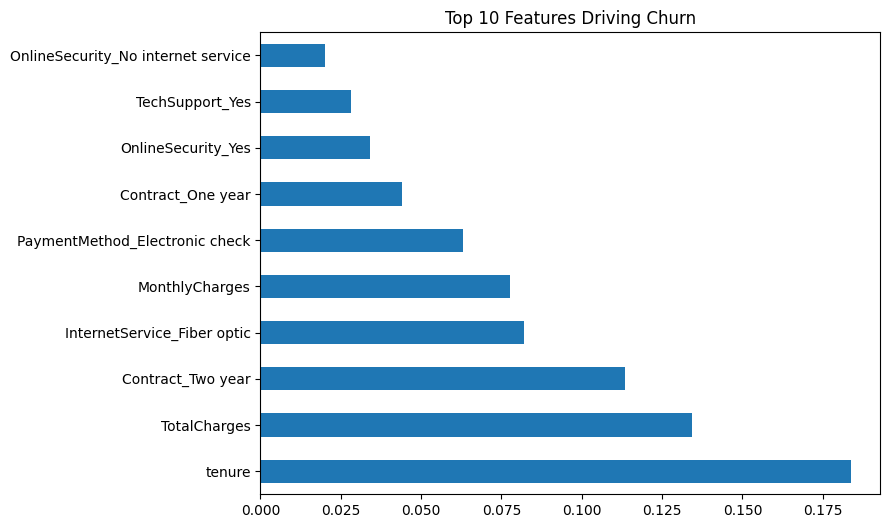

In [154]:
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Features Driving Churn")
plt.show()


Step 8: Feature Importance

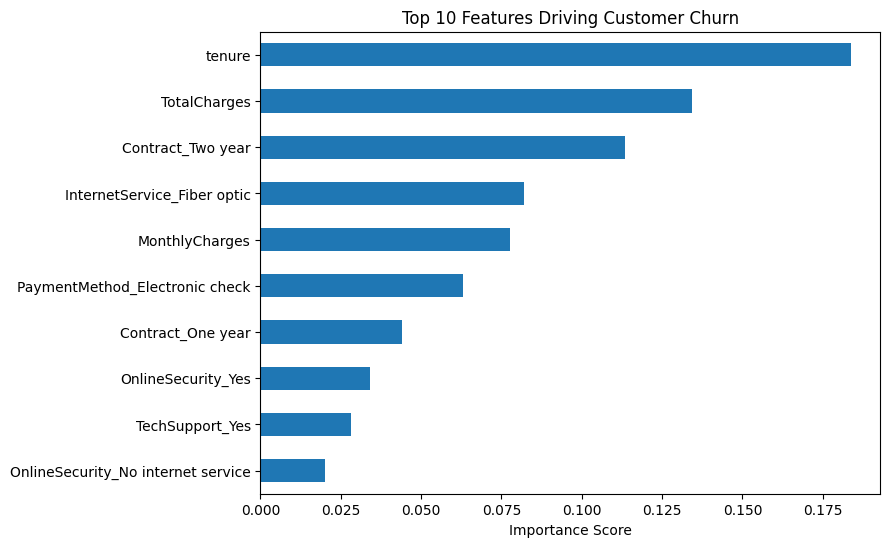

In [155]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a Series with feature importance values
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort values descending and take top 10
top_features = feat_importances.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8,6))
top_features.plot(kind='barh')
plt.gca().invert_yaxis()  # highest importance on top
plt.title("Top 10 Features Driving Customer Churn")
plt.xlabel("Importance Score")
plt.show()


“Tenure is the most important feature driving churn predictions, suggesting that newer customers are at higher risk of leaving. Other top features like Contract type and MonthlyCharges also play significant roles.”

Step 9: Hyperparameter Tuning (RandomizedSearchCV)

In [156]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [157]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 8, 12, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


In [158]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=20,          # number of different combinations to try
    cv=3,               # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1           # use all cores
)


In [159]:
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [5, 8, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [160]:
print(rf_random.best_params_)


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': True}


Step 10: Retrain and Evaluate

Retrain using best parameters:

In [161]:
rf_best = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    bootstrap=True,
    class_weight='balanced',
    random_state=42
)

rf_best.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [162]:
y_pred_best = rf_best.predict(X_test)


In [163]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))



              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1033
           1       0.57      0.65      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407

[[854 179]
 [132 242]]


Step 11: SHAP Analysis



In [ ]:
!pip install shap


  Using cached shap-0.48.0-cp313-cp313-win_amd64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.61.2-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl.metadata (5.0 kB)
  Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached shap-0.48.0-cp313-cp313-win_amd64.whl (545 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.61.2-cp313-cp313-win_amd64.whl (2.8 MB)
Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl (30.3 MB)
Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl (12.6 MB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.1

   ------ --------------------------------- 1/6 [numpy]
   ------ --------------------------------- 1/6 [numpy]
    Uninstalling numpy-2.3.1:
   -----

In [ ]:
import shap


In [164]:
explainer = shap.TreeExplainer(rf_best)
shap_values = explainer.shap_values(X_test)


In [166]:
# Check X_test shape
print(X_test.shape)

# Check SHAP values
print(type(shap_values))
if isinstance(shap_values, list):
    for i, sv in enumerate(shap_values):
        print(f"Class {i} SHAP values shape:", sv.shape)
else:
    print("SHAP values shape:", shap_values.shape)


(1407, 30)
<class 'numpy.ndarray'>
SHAP values shape: (1407, 30, 2)


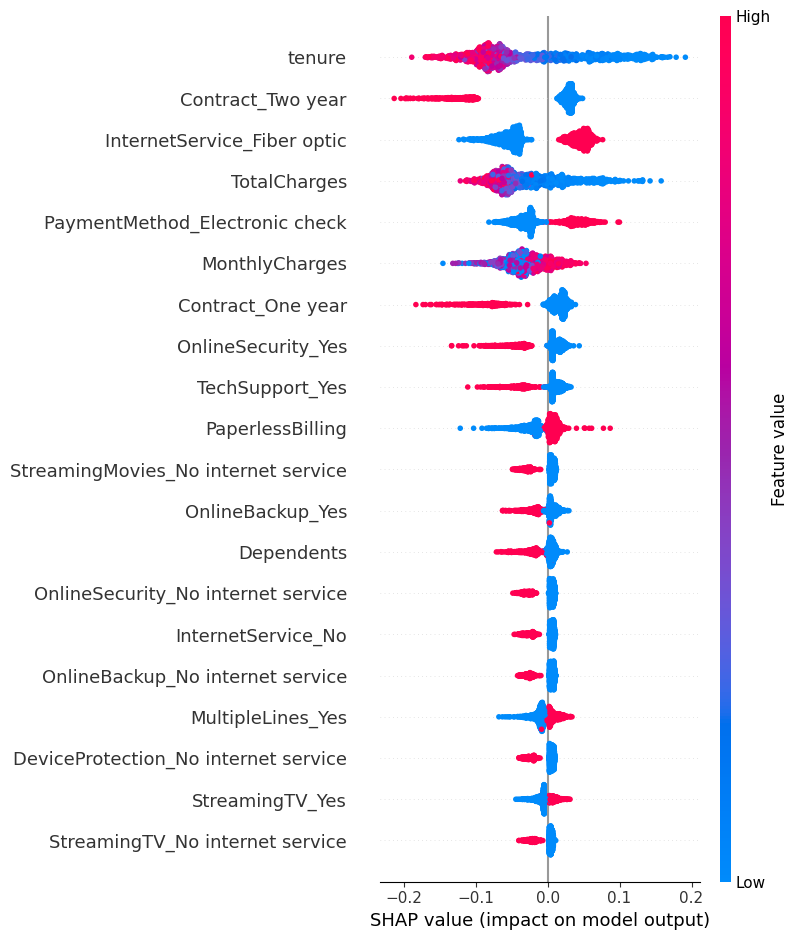

In [167]:
# Pick SHAP values for class 1 (churn)
shap_values_class1 = shap_values[:, :, 1]

# Plot
shap.summary_plot(shap_values_class1, X_test, feature_names=X_test.columns)

